In [16]:
import torch
import torch.nn as nn 
import torch.nn.functional as F

In [17]:
# Create a model class that inherits the nn.Module 
class Model(nn.Module):
    # Input layer (4 features of the flower) --> 
    # Hidden Layer1 (some number of neurons) --> 
    # Hidden Layer2 (some number of neurons) --> 
    # output (3 classes of iris)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # Instantiates the parent class we inherit
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))
        return x

In [18]:
# Pick a manual seed
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [21]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
my_df.variety = my_df.variety.replace('Setosa', 0)
my_df.variety = my_df.variety.replace('Versicolor', 1)
my_df.variety = my_df.variety.replace('Virginica', 2)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Train test split

# We want the X,y to be numpy arrays
X = my_df.drop('variety', axis=1).values
y = my_df.variety.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [26]:
# Convert X features and y labels to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
# Set criterion of model to measure the error 
# i.e. how far off are the predictions from the data
criterion = nn.CrossEntropyLoss()
# Choose an optimizer and learning rate 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
# Train our model! 
# Epoch = a run through the whole network 
epochs = 200
losses = []

for i in range(0,epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)
    
    # Measure the loss (synonym for error)
    loss = criterion(y_pred, y_train) # predicted value vs target value
    
    # Keep track of losses
    losses.append(loss.detach().numpy())
    
    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8516881465911865
Epoch: 30 and loss: 0.6555684804916382
Epoch: 40 and loss: 0.45029523968696594
Epoch: 50 and loss: 0.27184727787971497
Epoch: 60 and loss: 0.15538781881332397
Epoch: 70 and loss: 0.09336268901824951
Epoch: 80 and loss: 0.06463459134101868
Epoch: 90 and loss: 0.05066271126270294
Epoch: 100 and loss: 0.042818114161491394
Epoch: 110 and loss: 0.037823475897312164
Epoch: 120 and loss: 0.034292835742235184
Epoch: 130 and loss: 0.03161431476473808
Epoch: 140 and loss: 0.029481174424290657
Epoch: 150 and loss: 0.027719343081116676
Epoch: 160 and loss: 0.026227371767163277
Epoch: 170 and loss: 0.02493550442159176
Epoch: 180 and loss: 0.023797666653990746
Epoch: 190 and loss: 0.022781454026699066


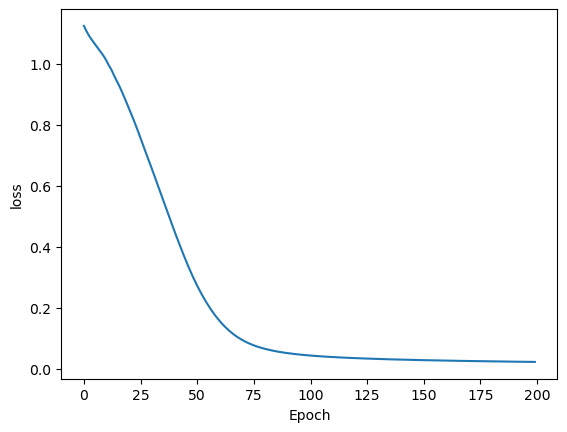

In [29]:
# Graph the loss v.s. epoch
fig = plt.figure()

plt.plot(range(epochs), losses)

plt.xlabel('Epoch')
plt.ylabel('loss')

plt.show()

In [32]:
with torch.no_grad(): # turn off back propagation
    y_eval = model.forward(X_test) # X_test are features from test set 
    loss = criterion(y_eval, y_test)

In [33]:
loss

tensor(0.1504)

In [39]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
#         print(f'{i + 1}.) {str(y_val)} \t {y_test[i]}')
        print(f'{y_val.argmax() == y_test[i]}')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
